## Biological Signals Analysis - Week 3 Homework Solutions

### Table of Contents
- [Math Exercises - Convolutions and Filters](#math-exercises)
    - [Question 1: Convolving Two Arrays](#question-1)
    - [Question 2: Convolving Two Signals with an FFT](#question-2)
    - [Question 3: Moving Average Filter](#question-3)
    - [Question 4: Butterwoth Filter](#question-4)
- [Programming Exercises](#programming-exercises)
    - [Question 5: Loading the Data](#question-5)
    - [Question 6: Noise Filtering](#question-6)
    - [Question 7: Creating ERP Template](#question-7)
    - [Question 8: Matched Filter Convolution](#question-8)

<a id="math-exercises"></a>
## Math Exercises - Convolutions and Filters

The first portion of this homework assignment contains mathematics questions related to the topics covered this week (Convolutions and Filters).
Please write your answers using the Jupyter markup cell’s LaTeX interpreter, or embed a scanned image/pdf of your answers into the markup cell.

More information about LaTeX and Jupyter markdown formatting can be found here:

[https://jupyterbook.org/en/stable/content/math.html](https://jupyterbook.org/en/stable/content/math.html)

And Here:

[https://ashki23.github.io/markdown-latex.html](https://ashki23.github.io/markdown-latex.html)

<a id="question-1"></a>
### Question 1: Convolving Two Arrays

Given two arrays, $A = [3, 4, 5, 6, 2]$ and $B = [1, 2, 3]$, perform the regular convolution of these arrays. Provide a detailed step-by-step calculation and explain how the convolution changes the characteristics of the original arrays. What is the significance of convolution in signal processing, especially in the context of neural data analysis?

---

#### Solution:
The convolution of arrays is defined as:

$ (A \circledast B)[n] = \sum_{m=-\infty}^{\infty} A[m] \cdot B[n - m] $

Let's execute this operation step by step:

1. **Flip array $B$**: The flipped version of $B$ is $B' = [3, 2, 1]$.
2. **Shift and multiply**: We slide $B'$ across $A$ and calculate the sum of products for each position.

- Initial positions of $B'$ result in zeros padding $A$ because of the nonexistent indices in $A$. 

#### Calculations:

- **Position 1**: (Overlap $B'$ and $A$ at the start)
  - $[3, 4, 5] \cdot [3, 2, 1] = (3 \times 3) + (4 \times 2) + (5 \times 1) = 9 + 8 + 5 = 22$

- **Position 2**: (Shift $B'$ one position right)
  - $[4, 5, 6] \cdot [3, 2, 1] = (4 \times 3) + (5 \times 2) + (6 \times 1) = 12 + 10 + 6 = 28$

- **Position 3**: (Shift $B'$ another position to the right)
  - $[5, 6, 2] \cdot [3, 2, 1] = (5 \times 3) + (6 \times 2) + (2 \times 1) = 15 + 12 + 2 = 29$

Thus, the convolution of $A$ and $B$ for the significant overlap positions is $[22, 28, 29]$.

**Significance in Signal Processing and Neural Data Analysis**:

- **Feature Extraction**: Convolution helps in extracting features from signals (like neural recordings) by emphasizing certain aspects while de-emphasizing others, making it crucial for analyzing complex neural data.
- **Filtering**: It acts as a filter, allowing specific patterns to be highlighted or suppressed. In neural data analysis, this can be critical for removing noise or extracting meaningful signals from raw data.
- **Temporal and Spatial Analysis**: Convolution facilitates the analysis of how signals change over time or space, enabling the study of dynamic processes in the neural data.

In neural networks, specifically convolutional neural networks (CNNs), convolution is used to automatically and adaptively learn spatial hierarchies of features from input data. This makes it particularly useful for tasks involving images, time-series data, or any data with spatial or temporal patterns, including neural data analysis where identifying patterns could be essential for understanding brain activity or diagnosing neurological disorders.

---

<a id="question-2"></a>
### Question 2: Convolving Two Signals with an FFT

Consider two discrete-time signals, $X[n]$ and $Y[n]$, each with a length of 1000 points. Write an expression for convolving these signals using the Fast Fourier Transform (FFT) method. Compare the computational complexity of this method with the direct convolution method. Why is FFT-based convolution particularly beneficial in the context of processing large neural datasets?

---

#### Solution:

Convolving two signals, $X[n]$ and $Y[n]$, especially when they are long, can be computationally intensive if done directly in the time domain. However, using the Fast Fourier Transform (FFT) significantly reduces the computational complexity. The process of convolving two signals using FFT involves the following steps:

1. **Compute the FFT of both signals**:
   - $\hat{X}[k] = \text{FFT}\{X[n]\}$
   - $\hat{Y}[k] = \text{FFT}\{Y[n]\}$

2. **Multiply the two FFTs pointwise**:
   - $\hat{Z}[k] = \hat{X}[k] \cdot \hat{Y}[k]$

3. **Compute the inverse FFT of the product** to get the convolution result in the time domain:
   - $Z[n] = \text{IFFT}\{\hat{Z}[k]\}$

Thus, the expression for convolving $X[n]$ and $Y[n]$ using FFT is $Z[n] = \text{IFFT}\{\text{FFT}\{X[n]\} \cdot \text{FFT}\{Y[n]\}\}$.

**Computational Complexity**:

- **Direct Convolution**: The direct method of convolution has a computational complexity of $O(N^2)$ for two signals of length $N$. This is because, for each of the $N$ points in the output signal, $N$ multiplications and $N-1$ additions are required.

- **FFT-based Convolution**: The FFT algorithm has a computational complexity of $O(N \log N)$ for a signal of length $N$. Since convolution via FFT requires two FFTs, one inverse FFT, and pointwise multiplication, its total complexity is $O(3N \log N + N) = O(N \log N)$. This is significantly more efficient than $O(N^2)$, especially for large $N$.

**Benefits for Processing Large Neural Datasets**:

1. **Efficiency**: FFT-based convolution is particularly beneficial for large datasets, such as those encountered in neural data analysis, because it drastically reduces computation time. This efficiency is critical when dealing with high-dimensional data or when real-time or near-real-time processing is necessary.

2. **Handling High-Resolution Data**: Neural datasets often come in high resolution and large volumes. FFT-based convolution can handle such data more efficiently, making it possible to analyze and process data without excessively compromising on computational resources.

3. **Scalability**: The efficiency gains from FFT-based convolution become more pronounced as the size of the dataset increases. This scalability is crucial for neural data analysis applications, where the volume of data can be vast.

---

<a id="question-3"></a>
### Question 3: Moving Average Filter

You have a signal $S = [2, 3, 4, 5, 6, 7, 8, 9, 10]$. Calculate the moving average of this signal using a Finite Impulse Response (FIR) filter with a window size of 3. Show your calculations in detail. Discuss the effect of the moving average filter on the signal, particularly in terms of smoothing and latency. How does this apply to neural signal processing?

--- 

#### Solution:

A moving average filter is a type of Finite Impulse Response (FIR) filter that averages the points in a signal over a specified window size. It's used for smoothing data by reducing noise and fluctuations. The formula for a moving average filter of window size $M$ is given by:

$ S_{\text{avg}}[n] = \frac{1}{M} \sum_{k=0}^{M-1} S[n-k] $

Given the signal $S = [2, 3, 4, 5, 6, 7, 8, 9, 10]$ and a window size of 3, let's calculate the moving average.

##### Calculations

For each position $n$ in the signal, the moving average $S_{\text{avg}}[n]$ is calculated using the three most recent points, including the current one. Note that for the first few elements, the window is partially outside the signal, leading to undefined values if we strictly follow the formula. In practice, we can start calculating the moving average from the point where a full window is available:

1. $S_{\text{avg}}[2] = \frac{1}{3}(S[2] + S[1] + S[0]) = \frac{1}{3}(4 + 3 + 2) = \frac{9}{3} = 3$
2. $S_{\text{avg}}[3] = \frac{1}{3}(S[3] + S[2] + S[1]) = \frac{1}{3}(5 + 4 + 3) = \frac{12}{3} = 4$
3. $S_{\text{avg}}[4] = \frac{1}{3}(S[4] + S[3] + S[2]) = \frac{1}{3}(6 + 5 + 4) = \frac{15}{3} = 5$
4. $S_{\text{avg}}[5] = \frac{1}{3}(S[5] + S[4] + S[3]) = \frac{1}{3}(7 + 6 + 5) = \frac{18}{3} = 6$
5. $S_{\text{avg}}[6] = \frac{1}{3}(S[6] + S[5] + S[4]) = \frac{1}{3}(8 + 7 + 6) = \frac{21}{3} = 7$
6. $S_{\text{avg}}[7] = \frac{1}{3}(S[7] + S[6] + S[5]) = \frac{1}{3}(9 + 8 + 7) = \frac{24}{3} = 8$
7. $S_{\text{avg}}[8] = \frac{1}{3}(S[8] + S[7] + S[6]) = \frac{1}{3}(10 + 9 + 8) = \frac{27}{3} = 9$

Therefore, the moving average of the signal with a window size of 3 is: $[3, 4, 5, 6, 7, 8, 9]$.

##### Effects of the Moving Average Filter

- **Smoothing**: The moving average filter smooths the signal by averaging out the values, which reduces the impact of short-term fluctuations or noise. This makes it easier to observe the underlying trends in the data.
- **Latency**: The filter introduces latency into the signal, as the output at any point is based on past values. The latency introduced is generally half the window size, which can be a critical factor in real-time signal processing applications.

##### Application to Neural Signal Processing

- **Noise Reduction**: In neural signal processing, a moving average filter can be used to reduce noise from recordings, enhancing the signal-to-noise ratio and making it easier to identify important features or patterns in the neural activity.
- **Trend Analysis**: By smoothing out fluctuations, it can help in highlighting underlying trends in neural signals, which is particularly useful in long-term monitoring or analysis of brain activity.
- **Latency Consideration**: While the latency introduced by the filter might not significantly affect offline analysis, it's crucial in real-time applications like brain-computer interfaces (BCIs), where responsiveness is key. The choice of window size can thus be a trade-off between smoothness and latency.

---

<a id="question-4"></a>
### Question 3: Butterworth Filter

Design a Butterworth low-pass filter with a cutoff frequency of 100 Hz for a signal sampled at 1000 Hz. Provide the order of the filter and its frequency response equation. Explain how the characteristics of a Butterworth filter make it suitable or unsuitable for certain types of neural signals. What considerations should be made when choosing the order of the filter?

---

#### Solution:

Designing a Butterworth low-pass filter involves specifying a cutoff frequency ($f_c$) beyond which the frequency components of the signal are significantly attenuated. For a signal sampled at 1000 Hz (sampling frequency $f_s = 1000$ Hz) and a desired cutoff frequency of 100 Hz, the normalized cutoff frequency ($\omega_c$) can be calculated using the formula $\omega_c = 2\pi f_c / f_s$.

The order of the filter ($n$) is crucial as it determines the steepness of the filter's roll-off around the cutoff frequency and its overall frequency response characteristics. The order of a Butterworth filter needed for a specific application depends on the desired sharpness of the cutoff and the acceptable levels of ripple in the passband and stopband. 

The general form of the frequency response equation for a Butterworth low-pass filter is given by:

$ H(\omega) = \frac{1}{\sqrt{1 + \left(\frac{\omega}{\omega_c}\right)^{2n}}} $

Where:
- $H(\omega)$ is the frequency response of the filter,
- $\omega$ is the frequency at which the response is evaluated,
- $\omega_c$ is the cutoff frequency, and
- $n$ is the order of the filter.

**Characteristics of a Butterworth Filter**:
- **Flat Passband**: Butterworth filters have a maximally flat frequency response in the passband, meaning there is no ripple. This characteristic is often desirable in neural signal processing as it ensures that all frequencies below the cutoff are passed with minimal alteration, preserving the shape of the original signal within the passband.
- **Monotonic Roll-off**: The roll-off from the passband to the stopband is smooth and monotonic, with the steepness increasing with the filter order. This makes Butterworth filters suitable for applications where a sharp cutoff is less critical, and a more gradual transition from the passband to the stopband is acceptable or preferred.

**Considerations for Neural Signals**:
- **Choosing the Order**: A higher-order filter provides a sharper cutoff but can introduce significant phase distortion and delay, affecting the temporal characteristics of the neural signals. The choice of filter order thus involves balancing between the sharpness of the cutoff and the acceptable level of phase distortion.
- **Phase Distortion**: For real-time processing of neural signals or in applications where preserving the phase is critical (such as event-related potential studies), lower-order filters or those designed with phase-neutral techniques (like zero-phase filtering with forward and reverse filtering) may be preferred.

---

<a id="programming-exercises"></a>
## Programming Exercises

In the following cells, you will write python code to manipulate and analyze an EEG signal, in order to gain insights about what is contained in the signal.

You are provided with 10 EEG recordings containing an ERP. These 10 recordings are in the file named "eeg_signals.pkl". You are also provided with a file called "erp_timestamps.txt", which contain the timestamps for the ERPs in the 10 signals.

You are also provided with an 11th EEG recording, in which you will try to locate the ERP. No timestamp is provided for this recording. This recording is saved in the file called "eeg_signal_to_analyze.pkl".

<a id="question-5"></a>
### Question 5: Loading the Data

Write a script to load the 10 EEG recordings located in the "eeg_signals.pkl" file. Once loaded, create visualizations for all of the recordings in both the time and frequency domains. Discuss any notable features you observe in these domains. How do these visualizations help in understanding the EEG recordings?

---

#### Solution:

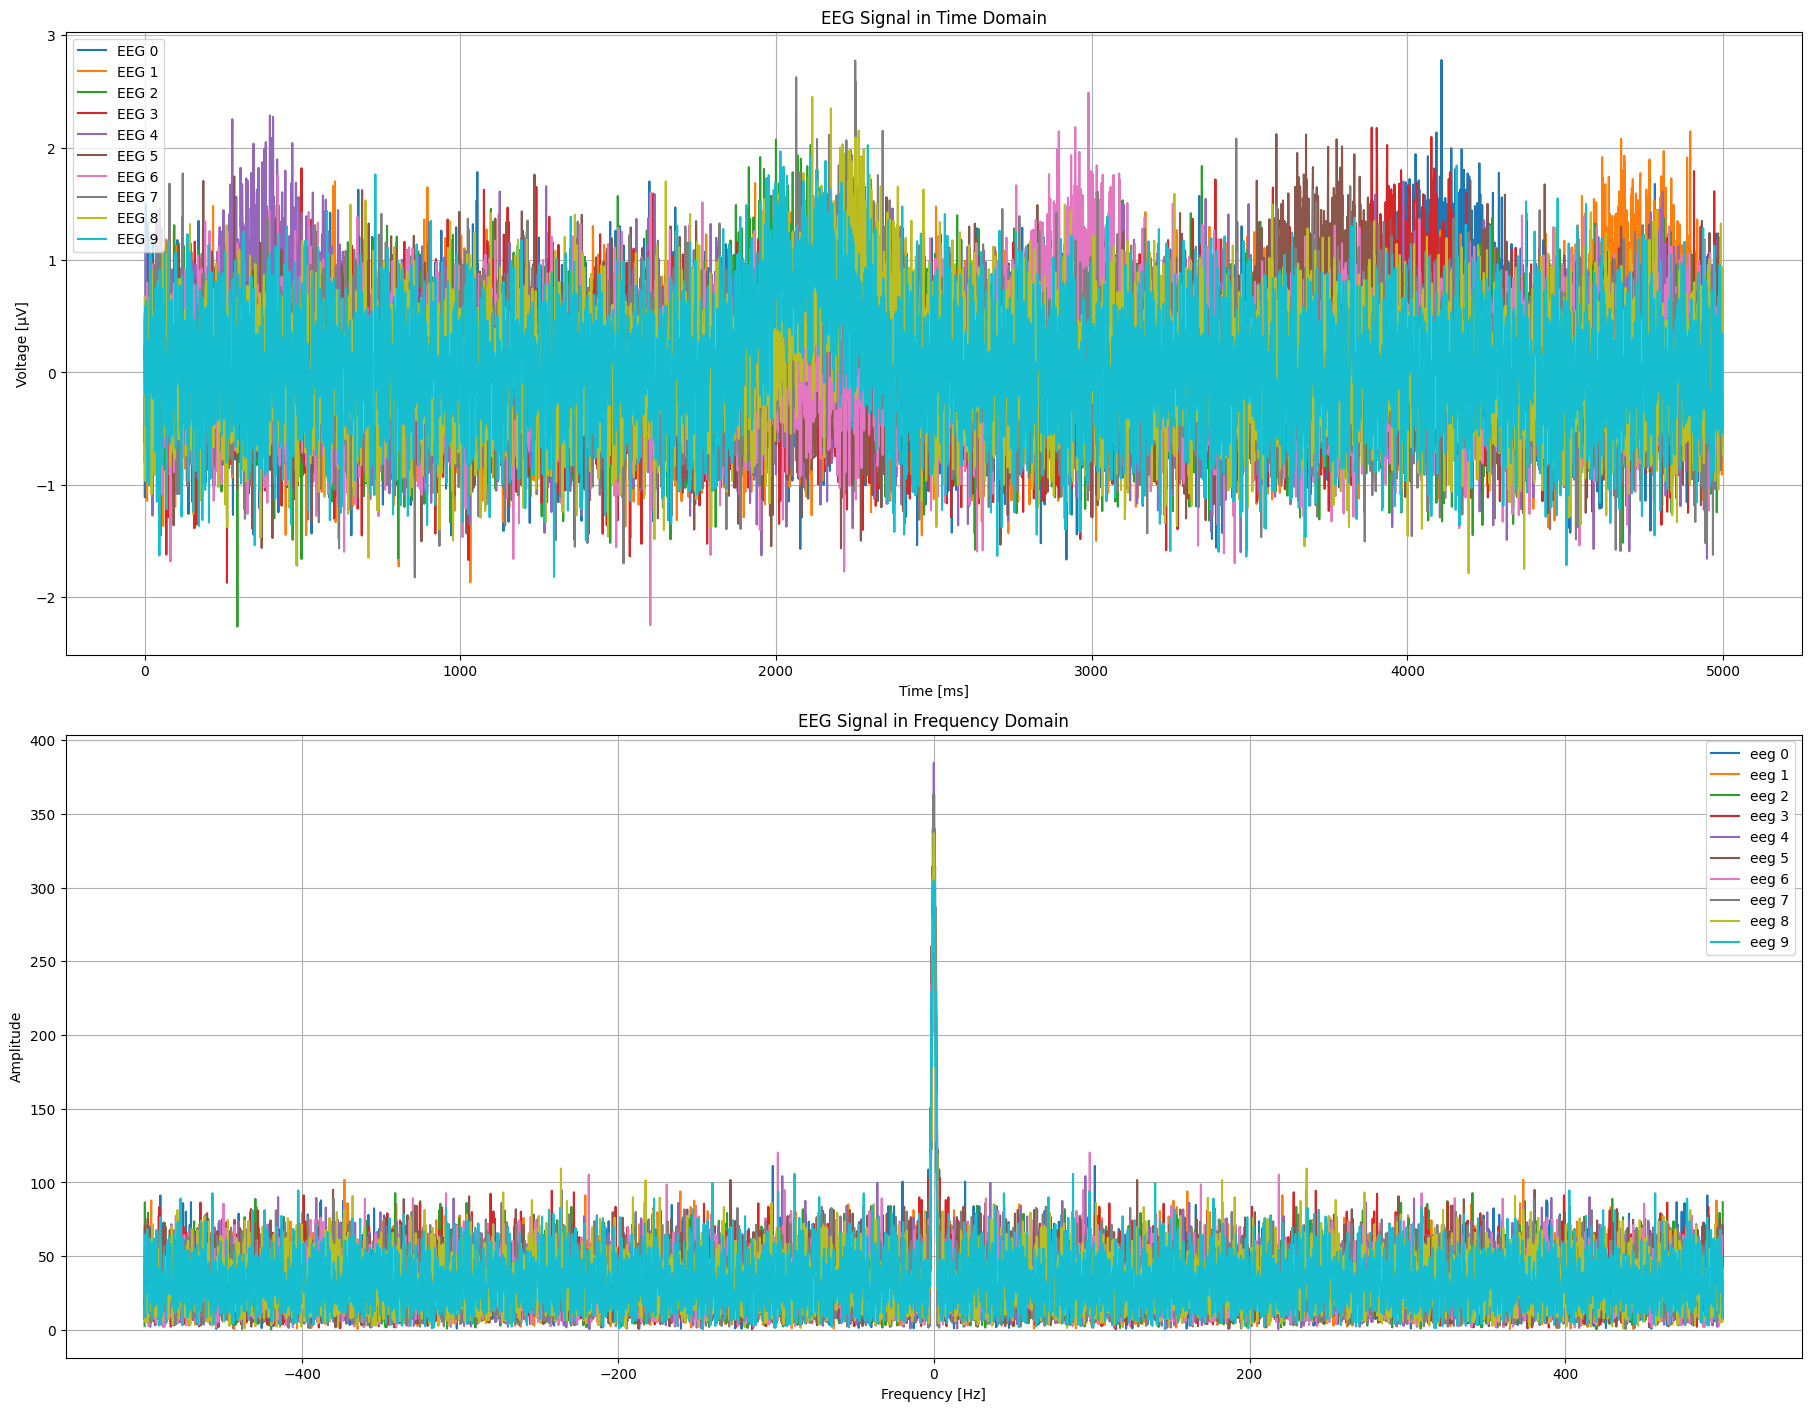

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Constants
EEG_SIGNALS_PATH = 'eeg_signals.pkl'
FS = 1000  # Sampling frequency in Hz
DT = 1 / FS  # Sampling interval in seconds

# Load EEG signals
eeg_signals = pd.read_pickle(EEG_SIGNALS_PATH)

def visualize_eeg_signals(signals):
    # FFT analysis
    n = len(signals[0])  # Assuming all signals have the same length
    freq = np.fft.fftfreq(n, d=DT)
    
    # Plotting
    fig, axs = plt.subplots(2, 1, figsize=(18, 14), constrained_layout=True)
    
    # Time domain
    time = np.arange(n) * DT * 1000  # Convert to milliseconds
    for i, signal in enumerate(signals):
        axs[0].plot(time, signal, label=f'EEG {i}')
    axs[0].set(title='EEG Signal in Time Domain', xlabel='Time [ms]', ylabel='Voltage [μV]')
    axs[0].legend()
    axs[0].grid(True)
    
    # Frequency domain
    eeg_signals_fft = np.array([np.fft.fft(signal) for signal in eeg_signals])
    for i, signal in enumerate(eeg_signals_fft):
        signal_fft = np.fft.fftshift(np.fft.fftfreq(eeg_signals[i].size, DT))
        axs[1].plot(signal_fft, np.abs(np.fft.fftshift(signal)), label=f'eeg {i}')

    axs[1].set(title='EEG Signal in Frequency Domain', xlabel='Frequency [Hz]', ylabel='Amplitude')
    axs[1].legend()
    axs[1].grid(True)
    
    plt.show()

visualize_eeg_signals(eeg_signals)


Visualizations help in identifying the characteristics of the EEG signals, such as the presence of noise, artifacts (e.g., from muscle movements or electrical interference), and the typical frequency bands associated with different states of brain activity.

By comparing the time domain signals and frequency domain analyses across the 10 EEG recordings, one could infer the variability and consistency of neural responses, identify common features associated with the ERPs, and understand how individual recordings might differ from each other.

---

<a id="question-6"></a>
### Question 6: Noise Filtering

Implement a noise filtering technique on the EEG recordings using a filter of your choice (e.g., low-pass, high-pass, band-pass, notch filter). Explain the rationale behind your choice of filter and its parameters (such as cutoff frequency). How does this filter improve the quality of the EEG data? Provide before and after visualizations of the filtered signal and discuss the impact of your filtering.

---
#### Solution:

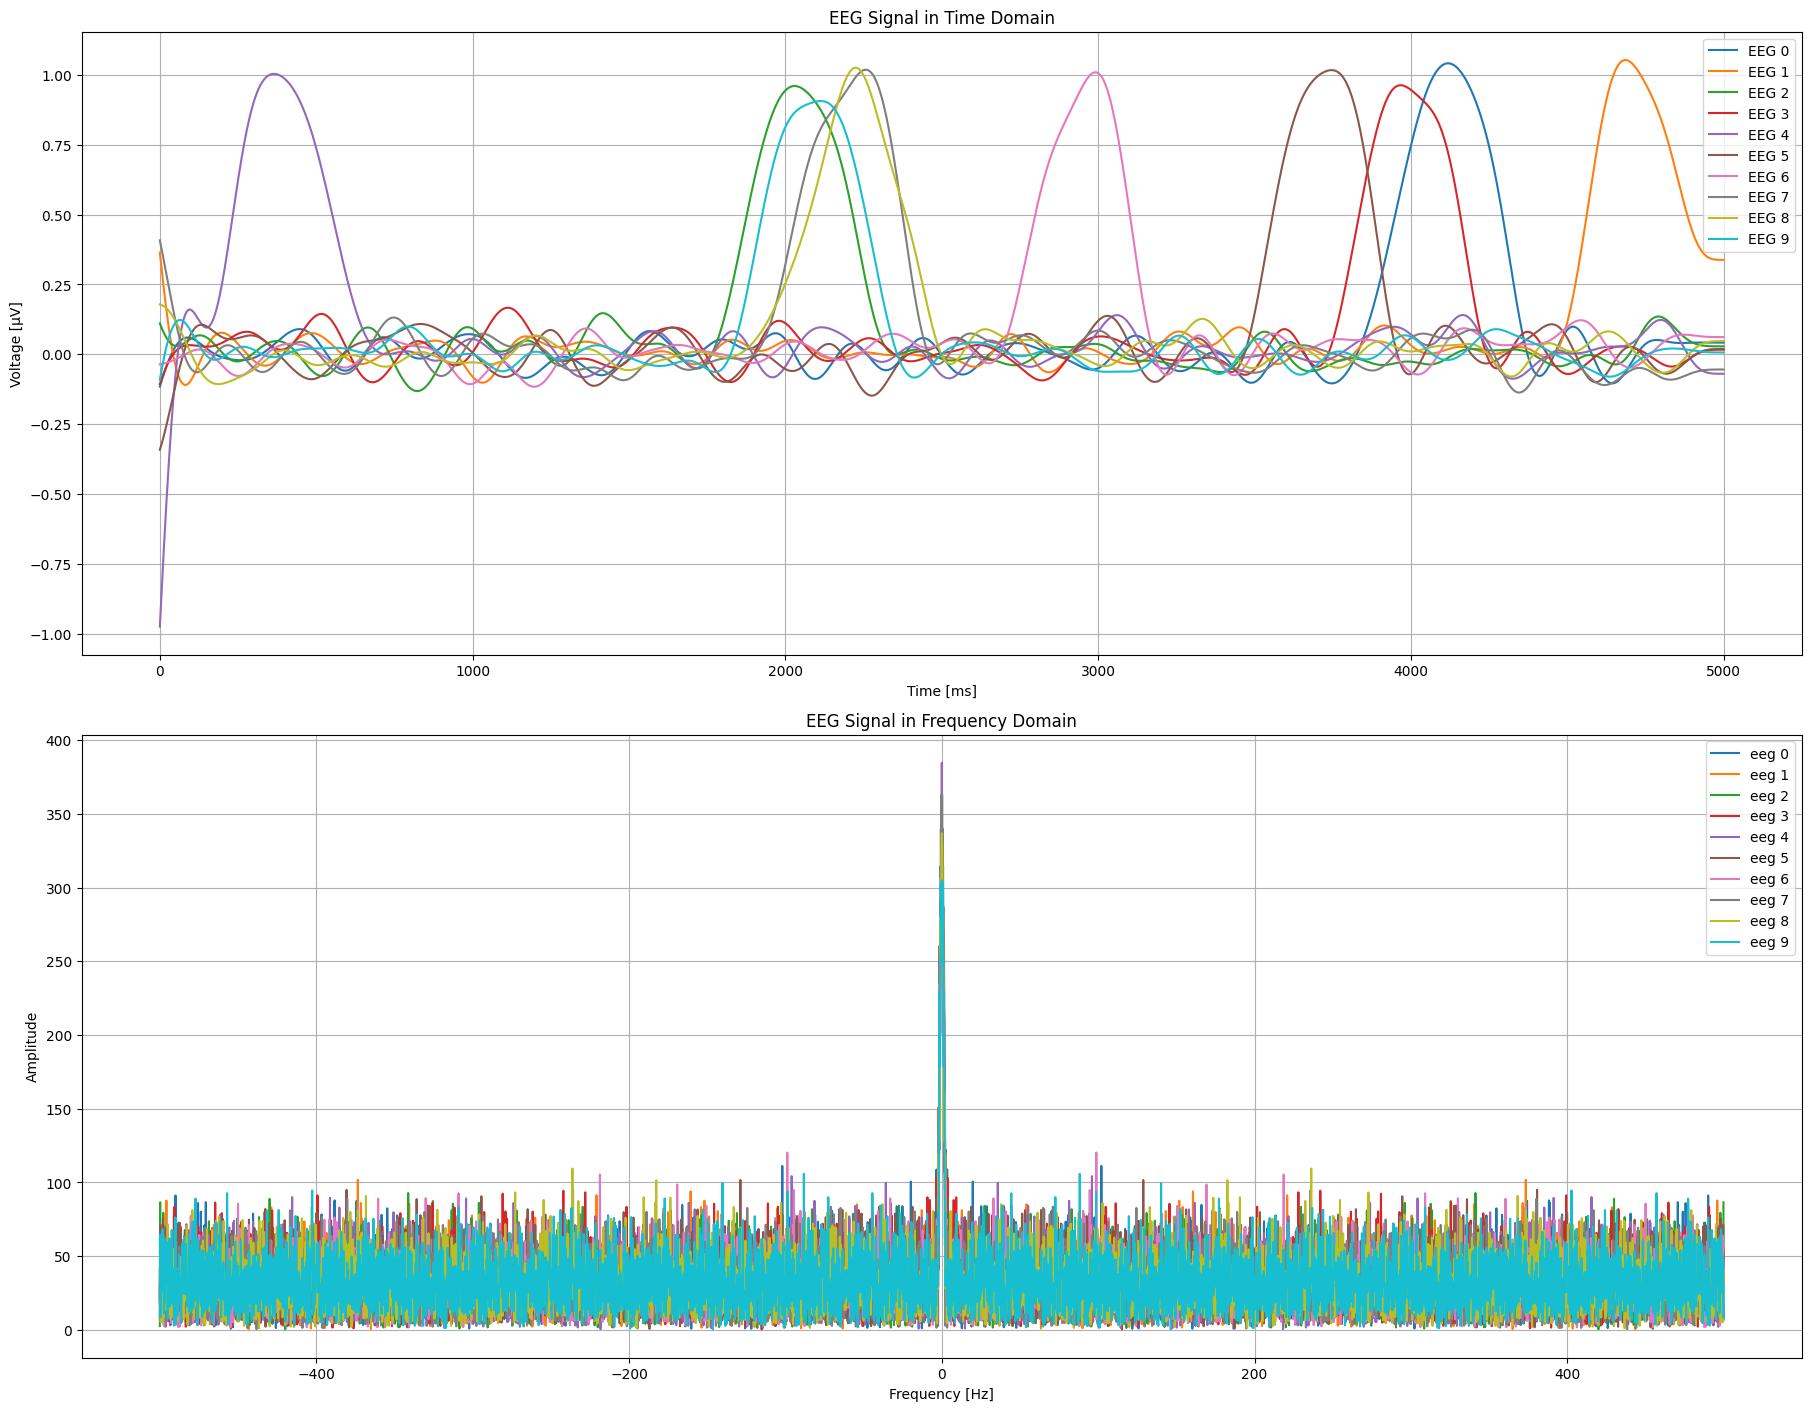

In [3]:
from scipy.signal import butter, filtfilt
import numpy as np

def apply_butterworth_lowpass_filter(signals, cutoff_hz, sampling_hz, order=5):
    """
    Applies a Butterworth low-pass filter to a collection of signals.

    Parameters:
    - signals: Array of signals to be filtered.
    - cutoff_hz: The cutoff frequency of the low-pass filter in Hertz.
    - sampling_hz: The sampling frequency of the signals in Hertz.
    - order: Order of the Butterworth filter (default is 5).

    Returns:
    - Array of filtered signals.
    """
    # Calculate the Nyquist frequency and normalize the cutoff frequency
    nyquist_hz = 0.5 * sampling_hz
    normal_cutoff = cutoff_hz / nyquist_hz
    
    # Design the Butterworth filter
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    
    # Apply the filter to each signal
    filtered_signals = np.array([filtfilt(b, a, signal) for signal in eeg_signals])
    
    return filtered_signals

cutoff_frequency = 5  # Cutoff frequency in Hz

filtered_eeg_signals = apply_butterworth_lowpass_filter(eeg_signals, cutoff_frequency, FS)

visualize_eeg_signals(filtered_eeg_signals)

Upon analyzing the frequency composition of the original EEG signal, it was observed that the predominant frequency components are below 5 Hz. Consequently, this frequency threshold was selected as the cutoff for the low-pass filter. Application of this filtering criterion has effectively isolated the "slow wave" phenomena, which was hypothesized to exist within the original EEG data. This enhancement in signal clarity underscores the presence of low-frequency oscillations, aligning with the anticipated characteristics of the neurological activity under investigation.

---

<a id="question-7"></a>
### Question 7: Creating ERP Template

Write a script to average the 10 EEG recordings, aligning them based on the known timestamps of the Event-Related Potentials (ERP). This will create an idealized template of the ERP. Plot the resulting averaged ERP and discuss its characteristics. How does averaging help in identifying the features of the ERP? Discuss any potential issues that might arise from this method.

---
#### Solution:


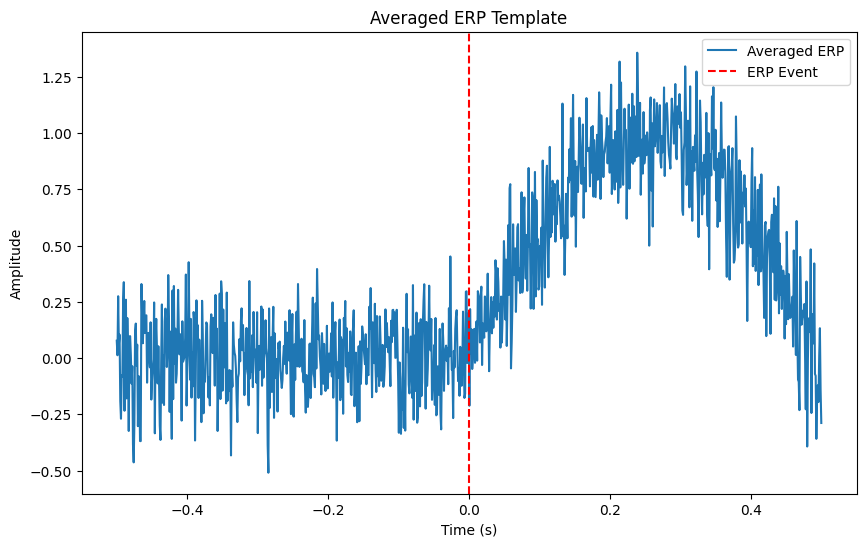

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Assuming eeg_signals and erp_timestamps have been loaded correctly

FS = 1000  # Sampling frequency in Hz
window_before = int(0.5 * FS)  # 500 ms before the ERP, converted to index
window_after = int(0.5 * FS)  # 500 ms after the ERP, converted to index
window_length = window_before + window_after  # Total length of the window

erp_segments = []

for signal, timestamp in zip(eeg_signals, erp_timestamps):
    timestamp_idx = int(timestamp * FS)  # Convert timestamp from seconds to index
    start_idx = max(timestamp_idx - window_before, 0)
    end_idx = min(timestamp_idx + window_after, len(signal))
    # Ensure all segments are of the same length
    if (end_idx - start_idx) == window_length:
        erp_segment = signal[start_idx:end_idx]
        erp_segments.append(erp_segment)

# Now we should have a list of equally sized segments
# Convert list to a 2D numpy array for efficient operations
erp_segments_array = np.array(erp_segments)

# Calculate the mean across the first dimension (across all segments)
average_erp = np.mean(erp_segments_array, axis=0)

# Plotting the averaged ERP
time_axis = np.linspace(-window_before / FS, window_after / FS, window_length)

plt.figure(figsize=(10, 6))
plt.plot(time_axis, average_erp, label='Averaged ERP')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Averaged ERP Template')
plt.axvline(x=0, color='red', linestyle='--', label='ERP Event')
plt.legend()
plt.show()

**Characteristics of Averaged ERP**:
- The averaged ERP template should highlight the characteristic features of the ERP, such as peaks and troughs corresponding to specific cognitive processes or stimuli responses.
- The signal's clarity is enhanced, with noise from individual recordings significantly reduced.

**Benefits of Averaging**:
- **Noise Reduction**: Averaging across multiple recordings improves the signal-to-noise ratio (SNR), making it easier to identify the ERP's features.
- **Feature Identification**: It helps in clearly identifying the temporal characteristics of the ERP, such as latency and amplitude of specific components (e.g., P300, N400).

**Potential Issues**:
- **Alignment Accuracy**: Misalignment of the ERP events due to inaccurate timestamps or variability in physiological responses could blur the averaged signal, reducing the clarity of the ERP components.
- **Individual Variability**: Differences in brain responses across subjects or trials can introduce variability, potentially obscuring subtle features of the ERP.
- **Artifact Contamination**: The presence of artifacts (e.g., eye movements, muscle activity) in some of the recordings could distort the averaged ERP if not adequately removed or filtered out before averaging.

---

<a id="question-8"></a>
### Question 8: Matched Filter Convolution

Use the ERP template created in the previous question to perform a matched filter convolution with the new EEG recording (the one where the ERP location is unknown). Write a script that implements this convolution and identify where in the recording the ERP is most likely to occur. Provide a plot showing the convolution output and indicate the location of the ERP. Discuss how the matched filter approach helps in detecting the ERP and any limitations or challenges of this method.

---

#### Solution:

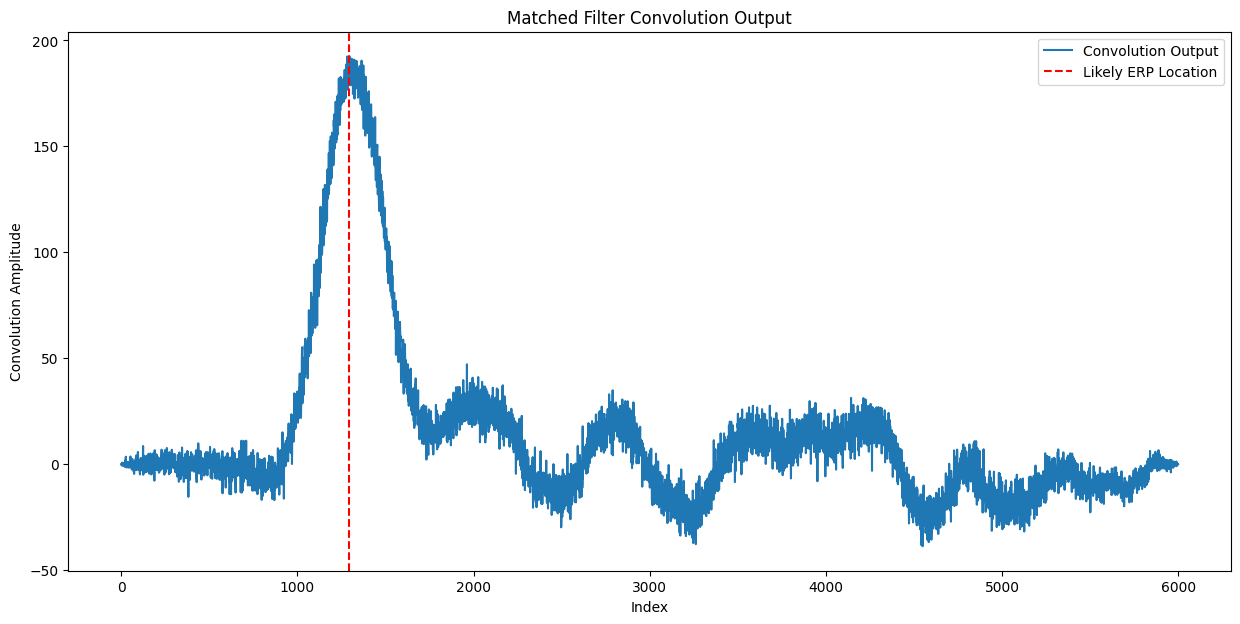

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Load the new EEG recording
with open('eeg_signal_to_analyze.pkl', 'rb') as file:
    new_eeg_signal = pickle.load(file)

# Assuming 'average_erp' is the ERP template from the previous question

# Normalize the ERP template
normalized_erp_template = average_erp / np.max(np.abs(average_erp))

# Perform the convolution
convolution_output = np.convolve(new_eeg_signal, normalized_erp_template, mode='full')

# Identify the peak in the convolution output
peak_index = np.argmax(np.abs(convolution_output))
peak_value = convolution_output[peak_index]

# Plot the convolution output
plt.figure(figsize=(15, 7))
plt.plot(convolution_output, label='Convolution Output')
plt.axvline(x=peak_index, color='r', linestyle='--', label='Likely ERP Location')
plt.title('Matched Filter Convolution Output')
plt.xlabel('Index')
plt.ylabel('Convolution Amplitude')
plt.legend()
plt.show()



**How It Helps**:
- **Sensitivity to Signal Shape**: The matched filter approach is highly sensitive to the specific shape of the ERP template, making it effective for detecting the presence of ERPs even in noisy data.
- **Signal-to-Noise Ratio (SNR) Improvement**: By focusing on the specific waveform of interest and integrating its signal over time, matched filtering effectively increases the SNR, making the ERP more distinguishable.
- **Localization**: The convolution output provides a clear indication of where the ERP is most likely to occur within the EEG recording, based on the similarity between the EEG signal and the ERP template.

**Limitations and Challenges**:
- **Template Matching**: The success of this method heavily relies on the accuracy and representativeness of the ERP template. If the template does not accurately reflect the ERP in the new recording, the method may fail to detect it or may generate false positives.
- **Signal Variability**: Variability in ERP shapes across different instances or subjects can make it challenging to create a one-size-fits-all template. This can be somewhat mitigated by using multiple templates or adaptive filtering techniques.
- **Noise and Artifacts**: While matched filtering improves SNR, the presence of high levels of noise or non-neural artifacts (e.g., eye movements, muscle activity) can still pose challenges and potentially lead to incorrect identification of ERP occurrences.

---